## Chapter 8
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA

%matplotlib inline

### For Figure 8.1, Arrow3D Class
#### The source of the following code is http://stackoverflow.com/a/11156353

In [2]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

### Figure 8.1 Left
The three figures may look different from the textbook because of random points.

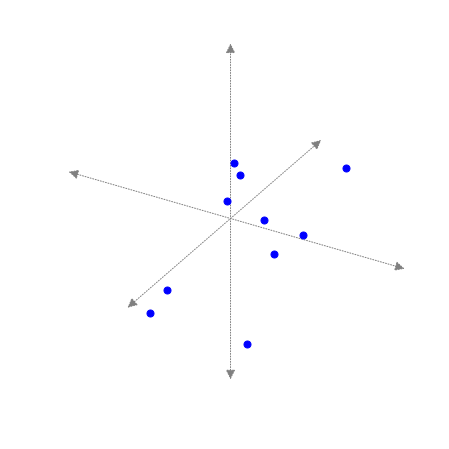

In [3]:
# Points in uniform distribution
d = 1.25
n = 10
x = np.random.uniform(-d,d,n)
y = np.random.uniform(-d,d,n)
z = np.random.uniform(-d,d,n)

# points being represented to vector and scaled.
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')

ax.plot(x,y,z, 'bo', markersize=7)

# Draw the axis
m = 2.5

xa = Arrow3D([-m,m], [0,0], [0,0], mutation_scale=20, lw=1, linestyle=":", arrowstyle="<|-|>", color='gray')
ya = Arrow3D([0,0], [-m,m], [0,0], mutation_scale=20, lw=1, linestyle=":", arrowstyle="<|-|>", color='gray')
za = Arrow3D([0,0], [0,0], [-m,m], mutation_scale=20, lw=1, linestyle=":", arrowstyle="<|-|>", color='gray')
ax.add_artist(xa)
ax.add_artist(ya)
ax.add_artist(za)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

ax.set_axis_off()

### Figure 8.1 Middle

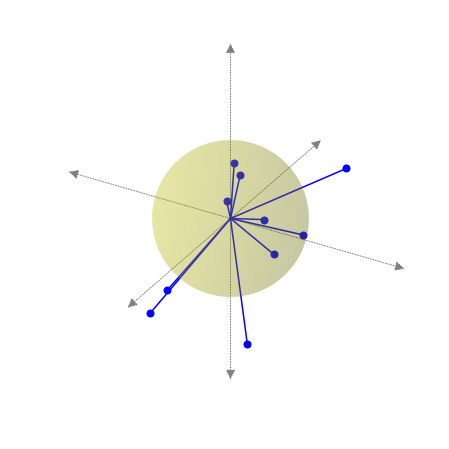

In [4]:
# Make vectors from those points and draw a transparent sphere
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')

for i in range(0,n):
    ax.plot([0,x[i]],[0,y[i]], [0,z[i]], color='b' )

ax.plot(x, y, z, 'bo', markersize=7)

# Draw a sphere    
u = np.linspace(0, 2 * np.pi, 500)
v = np.linspace(0, np.pi, 500)

x1 = 1 * np.outer(np.cos(u), np.sin(v))
y1 = 1 * np.outer(np.sin(u), np.sin(v))
z1 = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x1, y1, z1, color='y', alpha=0.2, linewidth=0)

# Draw axis through the origin
m = 2.5

xa = Arrow3D([-m,m], [0,0], [0,0], mutation_scale=20, lw=1, linestyle=':', arrowstyle="<|-|>", color='gray')
ya = Arrow3D([0,0], [-m,m], [0,0], mutation_scale=20, lw=1, linestyle=':', arrowstyle="<|-|>", color='gray')
za = Arrow3D([0,0], [0,0], [-m,m], mutation_scale=20, lw=1, linestyle=':', arrowstyle="<|-|>", color='gray')
ax.add_artist(xa)
ax.add_artist(ya)
ax.add_artist(za)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

ax.set_axis_off()

### Figure 8.1 Right

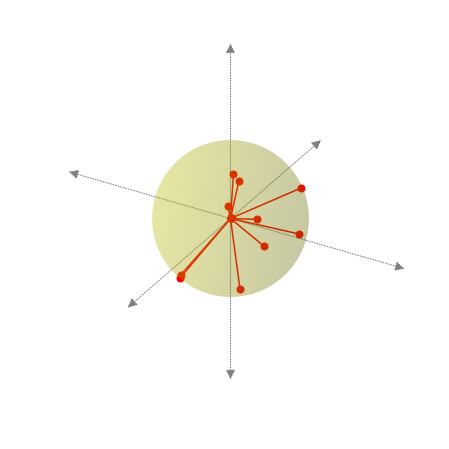

In [5]:
# Then make unit vectors from those points and draw a transparent sphere
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')

# New points
for i in range(0,n):
    mag = (x[i]**2 + y[i]**2+ z[i]**2)**0.5
    ax.plot([0,x[i]/mag],[0,y[i]/mag], [0,z[i]/mag], color='r', marker='o', markersize=7)

    
# Draw sphere    
u = np.linspace(0, 2 * np.pi, 500)
v = np.linspace(0, np.pi, 500)

x1 = 1 * np.outer(np.cos(u), np.sin(v))
y1 = 1 * np.outer(np.sin(u), np.sin(v))
z1 = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x1, y1, z1, color='y', alpha=0.2, linewidth=0)

# Draw axis through the origin
m = 2.5

xa = Arrow3D([-m,m], [0,0], [0,0], mutation_scale=20, lw=1, linestyle=":", arrowstyle="<|-|>", color='gray')
ya = Arrow3D([0,0], [-m,m], [0,0], mutation_scale=20, lw=1, linestyle=":", arrowstyle="<|-|>", color='gray')
za = Arrow3D([0,0], [0,0], [-m,m], mutation_scale=20, lw=1, linestyle=":", arrowstyle="<|-|>", color='gray')
ax.add_artist(xa)
ax.add_artist(ya)
ax.add_artist(za)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

ax.set_axis_off()

### Figure 8.16 Left - PCA

(-3, 22)

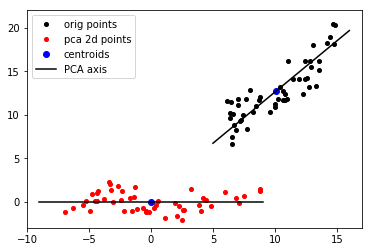

In [6]:
numPoints = 50
x = np.random.uniform(3,12,numPoints) +3
y = x + np.random.uniform(-3,3,numPoints)+3

# Use PCA function
X = np.array([[xi,yi] for xi,yi in zip(x,y)])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pts =[abs(d[1]) for d in pca_result]
min_index = np.argmin(pts)

x_pca = np.linspace(0,18,30)
r = np.matmul([-5,0],pca.components_)
centroid_orig = [sum(x)/float(len(x)), sum(y)/float(len(x))]
centroid_pca = [sum(pca_result[:,0])/float(len(x)), sum(pca_result[:,1])/float(len(x))]

# Plot points and lines
plt.plot(x,y,'ko', label='orig points', markersize = 4)
plt.plot(pca_result[:,0], pca_result[:,1],'ro', label='pca 2d points', markersize=4)
plt.plot([centroid_orig[0], centroid_pca[0]], [centroid_orig[1], centroid_pca[1]],'bo', label='centroids')
plt.plot([-9,9],[0,0],'k-', label='PCA axis')

# Line through orig points
line_xrange = np.linspace(5,16,20)
line_slope = (centroid_orig[1] - y[min_index])/(centroid_orig[0]- x[min_index])
b = -centroid_orig[0]*line_slope + centroid_orig[1]
plt.plot(line_xrange, line_slope*line_xrange + b, 'k-')

plt.legend(loc='upper left')
plt.xlim(-10,17)
plt.ylim(-3,22)

### Figure 8.16 Right - PCA

(6, 21)

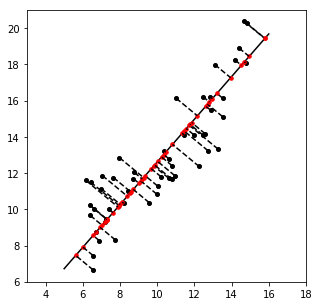

In [7]:
plt.figure(figsize=(5,5))

#Draw just the original points, the line and their projection to the line.
plt.plot(x,y,'ko', markersize=4)
plt.plot(line_xrange, line_slope*line_xrange + b, 'k-')
for xi,yi in zip(x,y):
    #Find the new b of the perpendicular line
    bi = 1/line_slope * xi + yi
    #Solve for x and y
    new_x = (bi-b)/(line_slope+(1/line_slope))
    new_y = line_slope*new_x + b
    plt.plot([new_x], [new_y], 'ro', markersize=3.5)
    plt.plot([xi, new_x], [yi, new_y], 'k--')
    
plt.xlim(3,18)
plt.ylim(6,21)